In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

import math
import cv2

In [74]:
sns.set()

In [2]:
from mask_function import *
from VI_function   import *
from statistics    import *

In [3]:
# 分析対象の画像選択
imgNo = "025"

In [4]:
# フォルダ選択

path = "../"
folderlist = os.listdir(path)

for f in folderlist:
    if imgNo in f:
        rootfile = f

rootpath = "../" + str(rootfile)

print("今回の分析対象フォルダ")
print(rootpath)

今回の分析対象フォルダ
../DJI_0250_50


In [5]:
filelist = os.listdir(str(rootpath) + "/data")

paths = [str(rootpath) + "/data/" + filename for filename in filelist ]
paths

['../DJI_0250_50/data/DJI_0250_50.JPG',
 '../DJI_0250_50/data/DJI_0250_50_color.JPG',
 '../DJI_0250_50/data/DJI_0251_50.TIF',
 '../DJI_0250_50/data/DJI_0252_50.TIF',
 '../DJI_0250_50/data/DJI_0253_50.TIF',
 '../DJI_0250_50/data/DJI_0254_50.TIF',
 '../DJI_0250_50/data/DJI_0255_50.TIF']

In [6]:
maskpath = str(rootpath) + "/masks"
maskfilelist = os.listdir(maskpath)
maskpathlist = [str(rootpath) + "/masks/"+ str(filename) for filename in maskfilelist]

maskfiles = []
maskpaths = []

for f, p in zip(maskfilelist, maskpathlist):
    maskfiles.append(f)
    maskpaths.append(p)
print(maskfiles)
print(maskpaths)

['DJI_0250_50_mask.png', 'z_DJI_0250_50_mask.xcf']
['../DJI_0250_50/masks/DJI_0250_50_mask.png', '../DJI_0250_50/masks/z_DJI_0250_50_mask.xcf']


In [15]:
# 読み込み
imgnameset = ["color2gray","color","mask","B","G","R","REDEDGE","NIR"]
color2gray = cv2.imread(paths[0],0)
color      = cv2.imread(paths[1])
BLUE       = cv2.imread(paths[2],0) 
GREEN      = cv2.imread(paths[3],0) 
RED        = cv2.imread(paths[4],0) 
REDEDGE    = cv2.imread(paths[5],0) 
NIR        = cv2.imread(paths[6],0) 

mask       = cv2.imread(maskpaths[0],0)

In [16]:
# 正規化

max      = 255 # 最大輝度値

normb    = BLUE/max
normg    = GREEN/max
normr    = RED/max
normrg   = REDEDGE/max
normnir  = NIR/max

In [17]:
# masklistを作る（BOOL INDEXのリスト）

masklist = make_masklist(mask)

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [18]:
# 各指標の計算
dvi   = DVI(normr, normnir)
gi    = GI(normg, normr)
msavi = MSAVI(normr, normnir)
ndvi  = NDVI(normr, normnir)
ndgi  = NDGI(normg, normnir)
ndre  = NDRE(normr, normnir)
osavi = OSAVI(normr, normnir)
rgri  = RGRI(normg, normr)
rdvi  = RDVI(normr, normnir)
sr    = SR(normr, normnir)

VIlist = [dvi, gi, msavi, ndvi, ndgi, ndre, osavi, rgri, rdvi, sr]
VIname = ["DVI", "GI", "MSAVI", "NDVI", "NDGI", "NDRE", "OSAVI", "RGRI", "RDVI", "SR"]


C:\Users\Ryosuke\Pictures\mikan\arida_1223_2020\multispectral\whiteboard_ari\corrected_data_1 (zure_nashi)\functions\VI_function.py:82: RuntimeWarning: invalid value encountered in true_divide
  ndgi = (nir-green)/(nir+green)
C:\Users\Ryosuke\Pictures\mikan\arida_1223_2020\multispectral\whiteboard_ari\corrected_data_1 (zure_nashi)\functions\VI_function.py:112: RuntimeWarning: divide by zero encountered in true_divide
  rgri = red/green


In [120]:
n_nan = []
n_inf = []

for vi in VIlist:
    n_nan.append(np.count_nonzero(np.isnan(vi)))
    n_inf.append(np.count_nonzero(np.isinf(vi)))

df_nan = pd.DataFrame(n_nan)
df_inf = pd.DataFrame(n_inf)

df_n_error = pd.concat([df_nan,df_inf], axis = 1).T
df_n_error.columns = VIname
df_n_error.index = ["nan(%)","inf(%)"]

df_n_error_percent = df_n_error/color2gray.size*100

,DVI,GI,MSAVI,NDVI,NDGI,NDRE,OSAVI,RGRI,RDVI,SR
nan(%),0.0,0.0,0.0,0.0,2.633558,0.0,0.0,0.000000,0.0,0.0
inf(%),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.432308,0.0,0.0


In [121]:
df_n_error.to_csv(str(rootpath)+"/result/"+str(imgNo)+"0_"+"df_n_error_percent.csv")

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [19]:
# jupyter内での表示
def showimg(img):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.show()
    elif len(img.shape)  == 2:
        plt.imshow(img,cmap='gray')
        plt.show()
    else:
        print("error_dayo")

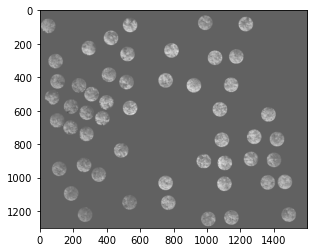

In [20]:
showimg(dvi*masklist[0])

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

In [21]:
def df_vi(vi, c, masklist):
    
    meanlist = []
    sizelist = []

    for m in masklist:
        meanlist.append(vi[m].mean())
        sizelist.append(vi[m].size)

    df_m = pd.DataFrame(meanlist)
    df_s = pd.DataFrame(sizelist)

    dfs = pd.concat([df_m,df_s],axis = 1)
    dfs.columns = [[VIname[c],VIname[c]],["meanBYtree","size"]]
    
    return dfs

In [42]:
dfs = df_vi(dvi,0,masklist)

c = 0
for vi in VIlist:
    if c != 0:
        print(c)
        df_c = df_vi(vi,c,masklist)
        dfs = pd.concat([dfs,df_c],axis = 1)
        c += 1
    else:
        c += 1

1
2
3
4
5
6
7
8
9


In [43]:
dfs.index.names = ["tree"]
dfs.columns.names = ["VIname","statistics"]

In [54]:
dfs_stack = dfs.stack()
dfs_stack

VIname                     DVI             GI          MSAVI           NDGI  \
tree statistics                                                               
0    meanBYtree       0.231391       1.227588       0.727337       0.438906   
     size        306424.000000  306424.000000  306424.000000  306424.000000   
1    meanBYtree       0.214953       1.268004       0.705741       0.424808   
     size          5892.000000    5892.000000    5892.000000    5892.000000   
2    meanBYtree       0.268911       1.307746       0.784405       0.485933   
...                        ...            ...            ...            ...   
50   size          5892.000000    5892.000000    5892.000000    5892.000000   
51   meanBYtree       0.223026       1.202266       0.716660       0.492191   
     size          5892.000000    5892.000000    5892.000000    5892.000000   
52   meanBYtree       0.188552       1.205977       0.663715       0.449868   
     size          5892.000000    5892.000000    5892.000000    5892.000000   

VIname                    NDRE           NDVI          OSAVI           RDVI  \
tree statistics                                                               
0    meanBYtree       0.509203       0.509203       0.370673       0.339809   
     size        306424.000000  306424.000000  306424.000000  306424.000000   
1    meanBYtree       0.510604       0.510604       0.365416       0.328730   
     size          5892.000000    5892.000000    5892.000000    5892.000000   
2    meanBYtree       0.575509       0.575509       0.422953       0.390029   
...                        ...            ...            ...            ...   
50   size          5892.000000    5892.000000    5892.000000    5892.000000   
51   meanBYtree       0.554168       0.554168       0.392366       0.349333   
     size          5892.000000    5892.000000    5892.000000    5892.000000   
52   meanBYtree       0.517874       0.517874       0.356775       0.310925   
     size          5892.000000    5892.000000    5892.000000    5892.000000   

VIname                    RGRI             SR  
tree statistics                                
0    meanBYtree       0.835974       3.320511  
     size        306424.000000  306424.000000  
1    meanBYtree       0.818509       3.167951  
     size          5892.000000    5892.000000  
2    meanBYtree       0.796928       3.850682  
...                        ...            ...  
50   size          5892.000000    5892.000000  
51   meanBYtree       0.845726       3.674364  
     size          5892.000000    5892.000000  
52   meanBYtree       0.840533       3.246123  
     size          5892.000000    5892.000000  

[106 rows x 10 columns]

In [77]:
dfs_stack.to_csv(str(rootpath)+"/result/"+str(imgNo)+"0_"+"dfs_include0.csv")

#### インデックスが0のところは，各樹のマスクをすべて足したもの(つまり全体平均)


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

### 
#### 全体平均（インデックス＝０）を抜いたデータフレームdfs_m_ex0


In [46]:
dfs_m_ex0 = dfs.drop(0,axis = 0).drop(["size"],axis=1,level = 1)
dfs_m_ex0.columns = VIname
dfs_m_ex0

,DVI,GI,MSAVI,NDVI,NDGI,NDRE,OSAVI,RGRI,RDVI,SR
tree,,,,,,,,,,
1,0.214953,1.268004,0.705741,0.510604,0.424808,0.510604,0.365416,0.818509,0.328730,3.167951
2,0.268911,1.307746,0.784405,0.575509,0.485933,0.575509,0.422953,0.796928,0.390029,3.850682
3,0.279614,1.209230,0.796011,0.560915,0.505003,0.560915,0.418403,0.860281,0.392298,3.940975
4,0.196044,1.173643,0.677408,0.486949,0.433695,0.486949,0.344997,0.877802,0.307119,3.083220
5,0.248234,1.238971,0.752772,0.545496,0.475751,0.545496,0.397845,0.831228,0.364633,3.630441
6,0.246550,1.240891,0.748190,0.520274,0.448991,0.520274,0.382764,0.829928,0.354472,3.459083
7,0.331655,1.300832,0.873580,0.617201,0.534595,0.617201,0.470347,0.786315,0.449042,4.360561
8,0.250300,1.226167,0.755211,0.519633,0.451225,0.519633,0.383784,0.836472,0.356906,3.402162
9,0.267220,1.361478,0.780442,0.535963,0.426066,0.535963,0.398787,0.765660,0.374206,3.432760


In [78]:
dfs_m_ex0.to_csv(str(rootpath)+"/result/"+str(imgNo)+"0_"+"dfs_m_ex0.csv")

In [48]:
dfs_m_ex0.describe()

,DVI,GI,MSAVI,NDVI,NDGI,NDRE,OSAVI,RGRI,RDVI,SR
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.231395,1.227593,0.727342,0.509207,0.438908,0.509207,0.370676,0.835971,0.339813,3.320548
std,0.057711,0.066991,0.086776,0.068904,0.056408,0.068904,0.060730,0.046533,0.064435,0.564252
min,0.125800,1.079190,0.561939,0.333869,0.295888,0.333869,0.237779,0.765660,0.213810,2.139410
25%,0.185945,1.179633,0.656273,0.464481,0.409472,0.464481,0.333393,0.802779,0.299579,2.923774
50%,0.224417,1.236093,0.718704,0.517588,0.432958,0.517588,0.375761,0.829106,0.345714,3.292045
75%,0.281073,1.276413,0.804707,0.560969,0.481538,0.560969,0.423006,0.863384,0.390597,3.703664
max,0.331655,1.361478,0.873580,0.617201,0.536415,0.617201,0.470347,0.957121,0.449042,4.366904


In [79]:
dfs_m_ex0.describe().to_csv(str(rootpath)+"/result/"+str(imgNo)+"0_"+"dfs_m_ex0_desctibe.csv")

In [67]:
filefile = os.listdir(str(rootpath)+"/result")
pathpath = [str(rootpath)+"/result/"+filename for filename in filefile]
pathpath

aa = pd.read_csv(pathpath[0], index_col = [0,1])
bb = pd.read_csv(pathpath[1], index_col = 0)
cc = pd.read_csv(pathpath[2], index_col = 0)

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

### 
### 各樹の指標値のばらつき

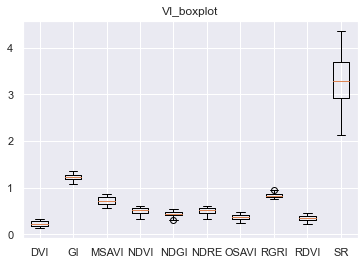

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("VI_boxplot")
ax.boxplot(dfs_m_ex0, labels = VIname)
plt.show()

fig.savefig(str(rootpath)+"/result/"+str(imgNo)+"0_"+"VI_boxplot", dpi = 200)

### 
### 各樹の指標値のばらつき
#### SRだけやたら値の範囲が大きめなので，SRだけ外して箱ひげ図を描いてみよう

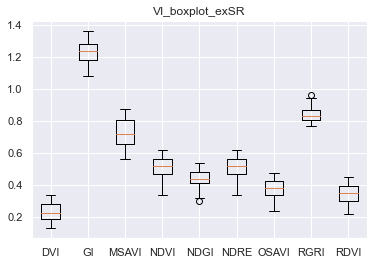

In [91]:
dfs_m_ex0_exSR = dfs_m_ex0.drop(["SR"],axis = 1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("VI_boxplot_exSR")
ax.boxplot(dfs_m_ex0_exSR, labels = VIname[0:9])
plt.show()

fig.savefig(str(rootpath)+"/result/"+str(imgNo)+"0_"+"VI_boxplot_exSR.png", dpi = 200)

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

### 
### 各樹の大きさ（ピクセル数）のばらつき
#### やたら大きいピクセルがあるかも（外すべきかも）

<AxesSubplot:xlabel='tree'>

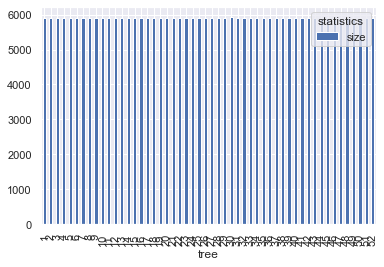

In [92]:
dfs_s_ex0 = dfs.drop(0,axis = 0).drop(["meanBYtree"],axis=1,level = 1).DVI
dfs_s_ex0.plot.bar()

In [161]:
VI = VIname[0]

dfs_s_ex0 = dfs[VI]["size"].drop(0)
dfs_s_ex0

tree
1     5892
2     5892
3     5892
4     5892
5     5892
6     5892
7     5892
8     5892
9     5892
10    5892
11    5892
12    5892
13    5892
14    5892
15    5892
16    5892
17    5892
18    5892
19    5892
20    5892
21    5892
22    5892
23    5892
24    5892
25    5892
26    5892
27    5892
28    5892
29    5892
30    5932
31    5892
32    5892
33    5892
34    5892
35    5892
36    5892
37    5892
38    5892
39    5892
40    5892
41    5892
42    5892
43    5892
44    5892
45    5892
46    5892
47    5892
48    5892
49    5892
50    5892
51    5892
52    5892
Name: size, dtype: int64

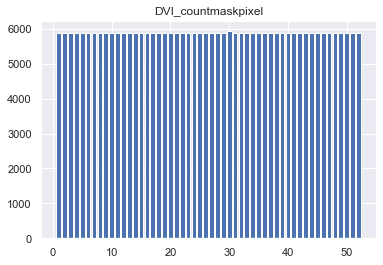

In [167]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title(str(VI)+"_countmaskpixel")
ax.bar(x=range(1,len(dfs[VI]["size"])), height=dfs_s_ex0)
plt.show()

fig.savefig(str(rootpath)+"/result/"+str(imgNo)+"0_"+str(VI)+"_countmaskpixel.png", dpi = 200)

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

### 
### 変動係数を調べてみよう
### 

In [174]:
# 変動係数で各VIのばらつき程度を見る
std  = dfs_m_ex0.describe().iloc[2]
mean = dfs_m_ex0.describe().iloc[1]

# 変動係数 coefficient of variation
CV = std/mean

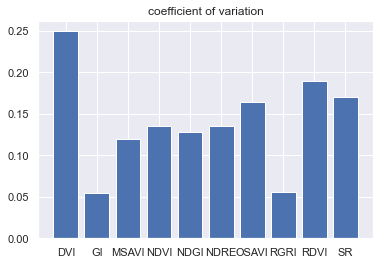

In [173]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("coefficient of variation")
ax.bar(x=VIname, height=CV)
plt.show()

fig.savefig(str(rootpath)+"/result/"+str(imgNo)+"0_VI_CV.png", dpi = 200)

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

### 
### ヒストグラム書いてみよう
### 

### matplotlibのめっちゃまとめ　を参考に
#### https://qiita.com/nkay/items/d1eb91e33b9d6469ef51

In [98]:
bins = math.ceil(1+math.log2(len(masklist)))

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

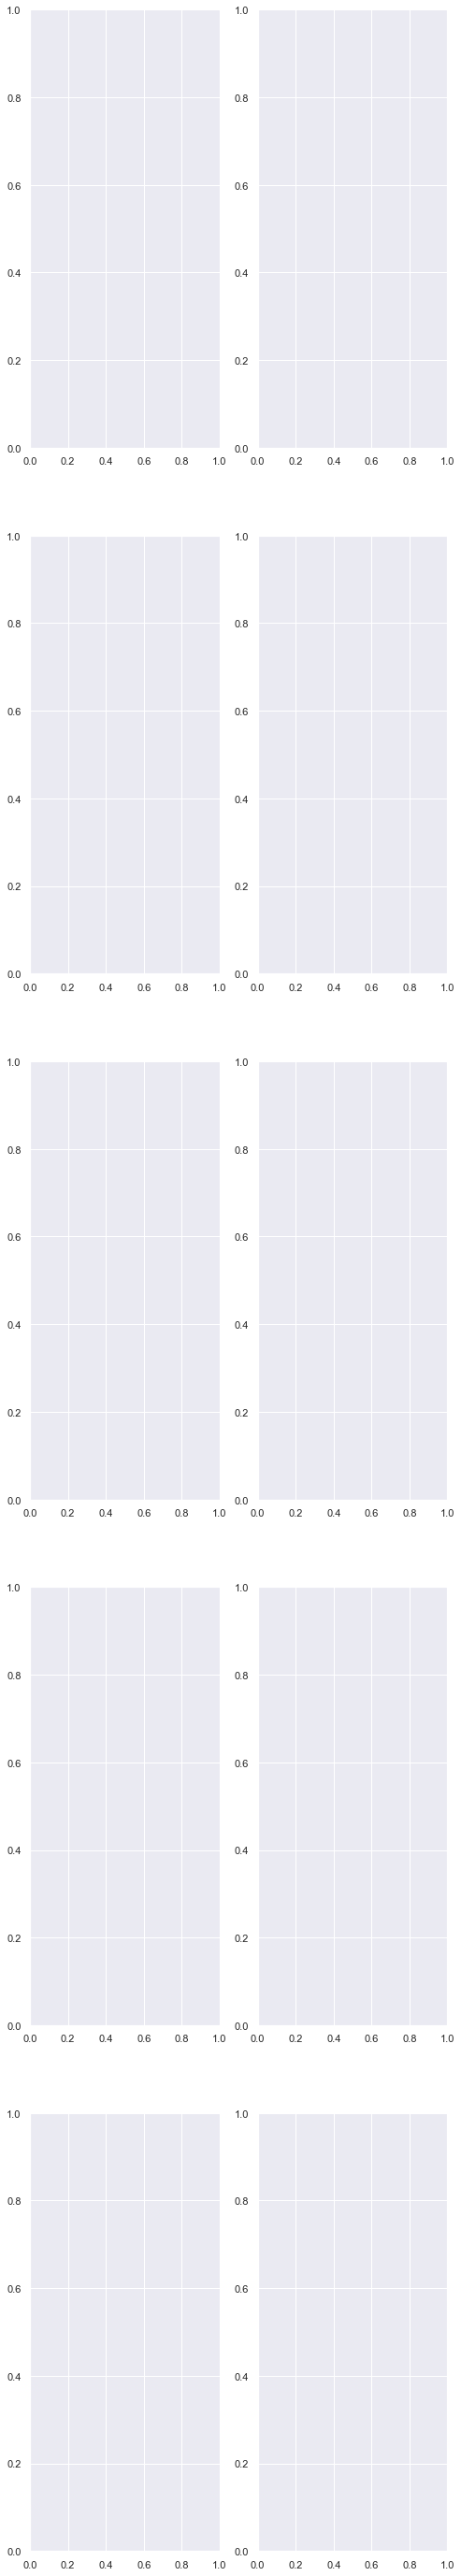

In [179]:
fig, axes = plt.subplots(5,2, figsize=(8,50))
axes

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

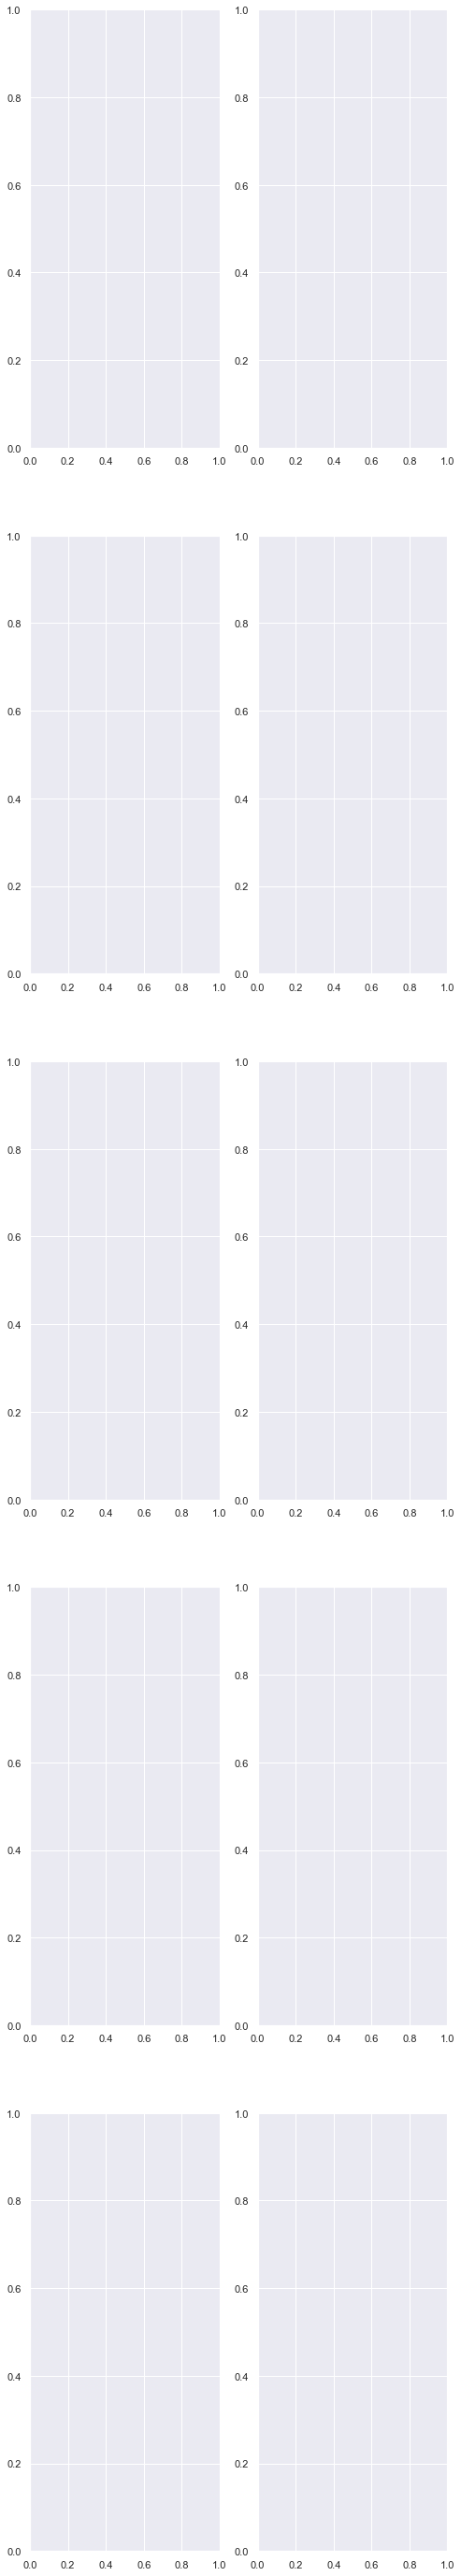

In [175]:

for c in range(len(VIname)):
    if c != 7:
        axes[c].set_title(VIname[c])
        axes[c].hist(x = dfs_m_ex0.iloc[:,c],bins = bins)
    else:
        axes[c].set_title(VIname[c])

<AxesSubplot:>

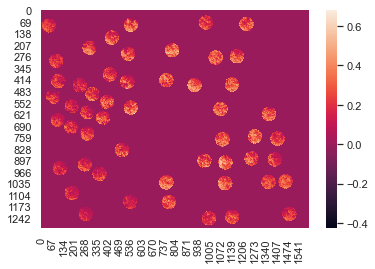

In [94]:
sns.heatmap(dvi*masklist[0])